[View in Colaboratory](https://colab.research.google.com/github/HaloAssassin973/Machine_Learning_Labs/blob/master/Laba1.ipynb)

#Лабораторная работа №1

В данной работе алгоритм машинного обучения классифицирует вина.

Сначала импортируем необходимые нам библиотеки

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, svm, datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
from matplotlib.pylab import rc, plot

Теперь загрузим датасет и выделим общую инормацию и target - то что будем предсказывать

In [0]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

Разобьем наш сет на тренировочный и на тестовый в соотношении 70% на 30%

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Теперь создадим модель классификатора основанного на методе ближайшего соседа и обучим ее. В данной модели можно установить два типа весовых коэффициентов "*uniform*" и "*distance*".

> Uniform - присваивает однородные весовые коэффициенты каждому соседу.

> Distance - назначает весовые коэффициенты, пропорциональные обратной величине расстояния от точки запроса.



In [5]:
n_neighbors = 22 #количество соседей
weights = "uniform"


knn = neighbors.KNeighborsClassifier(n_neighbors, weights) #создание модели
knn.fit(X_train, y_train) #обучение модели
y_knn = knn.predict(X_test)
y_knn = np.around(y_knn, decimals = 0).astype(np.int64)

scores = cross_val_score(knn, X_test, y_test) #кросс-валидация
    
#Выводы результатов и метрик
print("Weights = %s" % (weights))
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (scores.mean() * 100, scores.std() * 2 * 100))
print(classification_report(y_test, y_knn, target_names = ['class 0', 'class 1', 'class 2']))

Weights = uniform
Accuracy: 57.73% (+/- 14.94%)
             precision    recall  f1-score   support

    class 0       0.79      0.75      0.77        20
    class 1       0.55      0.69      0.61        16
    class 2       0.40      0.33      0.36        18

avg / total       0.59      0.59      0.59        54



Метрики которые используются для анализа: Precision, Recall, F1-score.

> Precision - точность - это интуитивная способность классификатора не помечать образец, являющийся положительным, который является отрицательным.

> Recall - полнота - это интуитивная способность классификатора найти все положительные образцы.

> F-мера - можно интерпретировать как средневзвешенное значение точности и полноты.




Теперь посторим график называемый ROC-кривая (Receiver Operating Characteristic curve). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR). TPR нам уже известна, это полнота, а FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно. В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1) мы получим площадь под кривой, равную единице. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1).

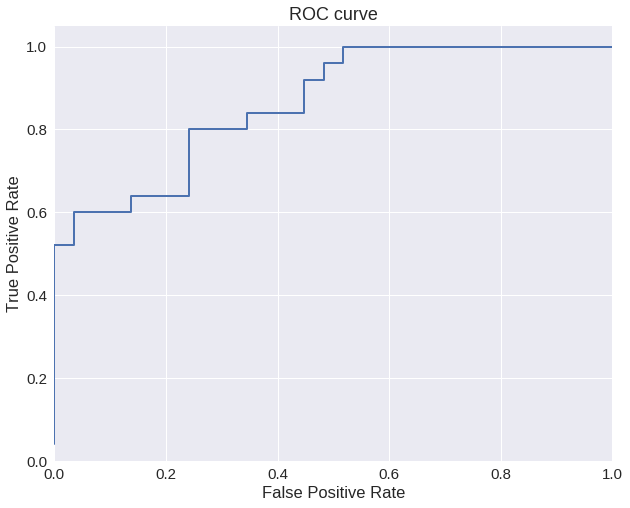

In [38]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Вывод: наш классификатор работает и имеет точность около 75%

Анализ гипер параметров модели

In [48]:
from sklearn.model_selection import RandomizedSearchCV

params = {"n_neighbors": np.arange(1, 30),
          "weights": ["uniform", "distance"]}

rsearch = RandomizedSearchCV(estimator = neighbors.KNeighborsClassifier(),
                             param_distributions = params,
                             n_iter = 58)
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_params_)

0.7661290322580645
{'weights': 'uniform', 'n_neighbors': 22}
